In [1]:
from dataset.videomatte import (
    VideoMatteDatasetForMH,
    VideoMatteTrainAugmentation,
    VideoMatteValidAugmentation,
)
from train_config import DATA_PATHS
from dataset.augmentation import (
    TrainFrameSampler,
    ValidFrameSampler
)
import os
from torch.utils.data import DataLoader, ConcatDataset
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
size_lr = (512,512)
f=open('LocalBGs.txt')
im_bgs=f.readlines()
im_bgs= [name.replace('\n','') for name in im_bgs]
        
# vnames=os.listdir(os.path.join(DATA_PATHS['videomatte']['train'],'fgr_com'))
# vnames=[
#     '0000.mp4',
#     '0003.mp4',
#     # '0006.mp4',
#     '0007.mp4','0008.mp4'
#        ]

# ds=[]

# for vname in vnames:
#     dataset= VideoMatteDatasetForMH(
#         videomatte_dir=DATA_PATHS['videomatte']['train'],
#         background_image_dir=DATA_PATHS['background_images']['train'],
#         background_video_dir=DATA_PATHS['background_videos']['train'],
#         size=512,
#         seq_length=10,
#         seq_sampler=TrainFrameSampler(),
#         vname=vname,
#         bgs=im_bgs,
#         transform=VideoMatteTrainAugmentation(size_lr))
#     ds.append(dataset)
    
# dataset_final=ConcatDataset(ds)

# dataloader = DataLoader(
#             dataset=dataset_final,
#             batch_size=5,
#             num_workers=0,
#             shuffle=True
# )

In [3]:
size_lr = (512,512)
f=open('LocalBGs.txt')
im_bgs=f.readlines()
im_bgs= [name.replace('\n','') for name in im_bgs]
        
dataset= VideoMatteDatasetForMH(
        videomatte_dir=DATA_PATHS['videomatte']['train'],
        background_image_dir=DATA_PATHS['background_images']['train'],
        background_video_dir=DATA_PATHS['background_videos']['train'],
        size=512,
        seq_length=10,
        seq_sampler=TrainFrameSampler(),
        bgs=im_bgs,
        transform=VideoMatteTrainAugmentation(size_lr))

dataloader = DataLoader(
            dataset=dataset,
            batch_size=5,
            num_workers=0,
            shuffle=True
)

/tmp/ipykernel_115528/2381664495.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


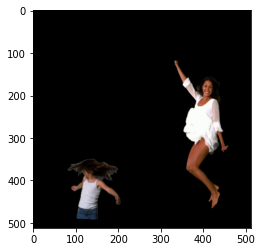

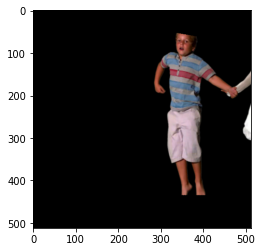

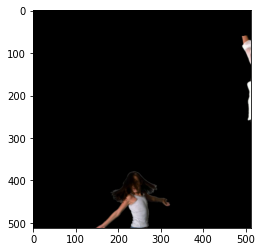

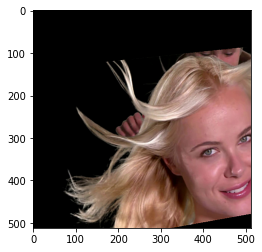

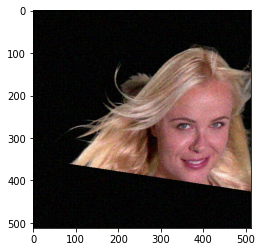

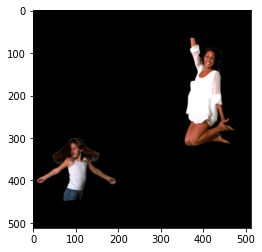

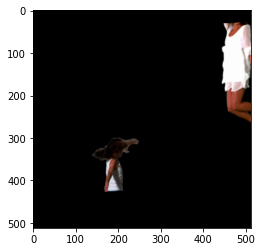

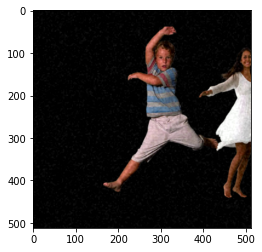

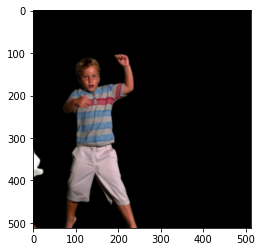

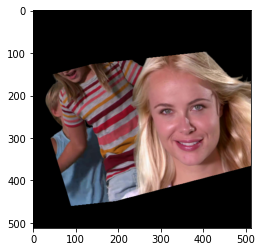

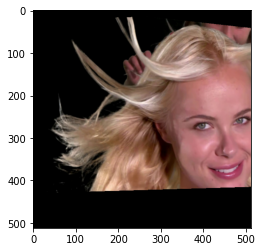

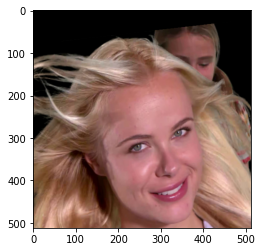

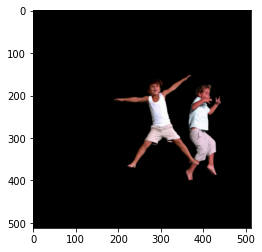

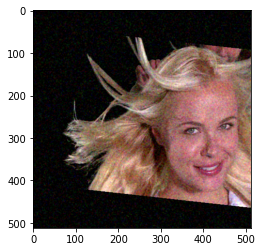

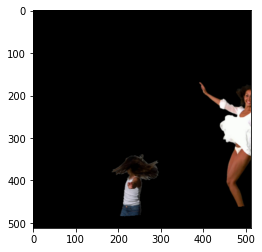

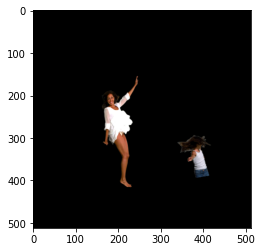

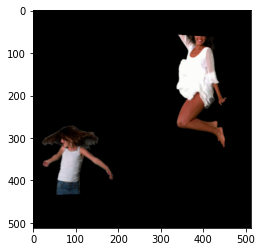

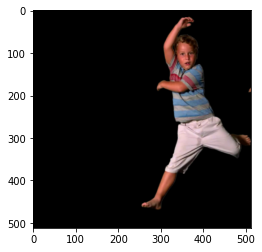

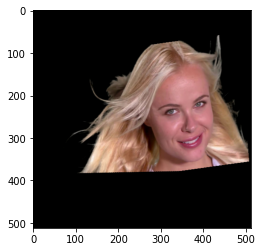

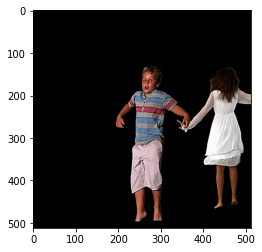

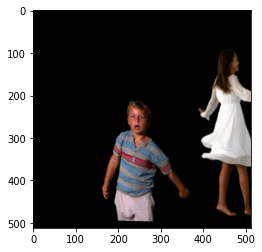

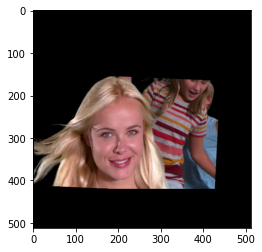

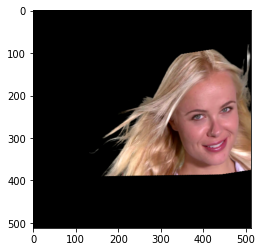

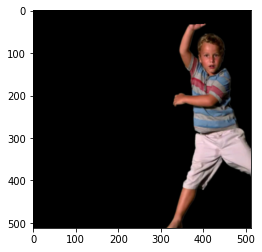

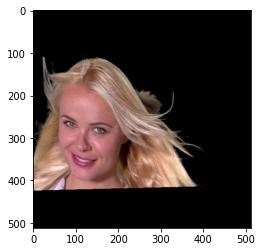

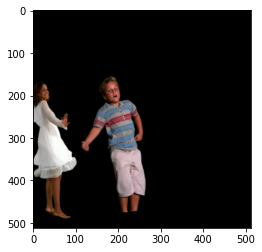

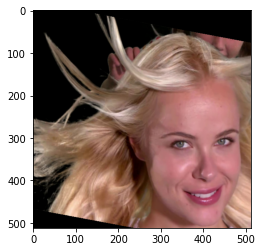

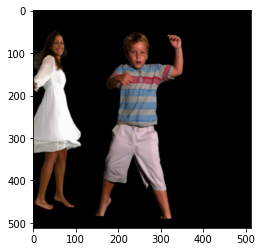

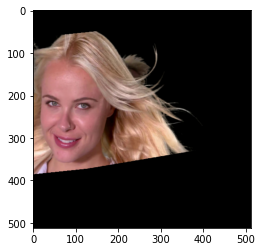

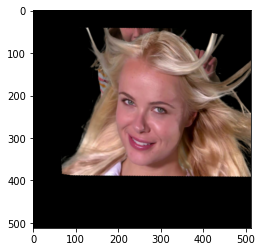

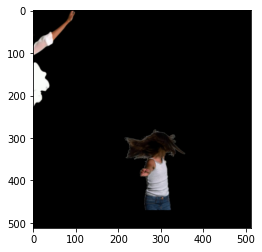

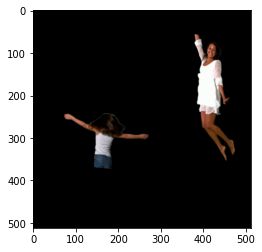

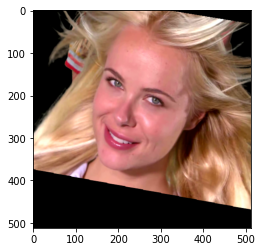

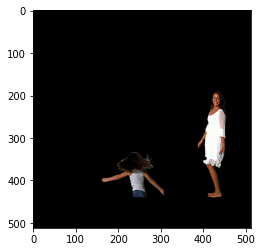

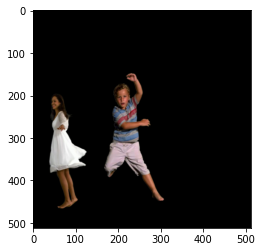

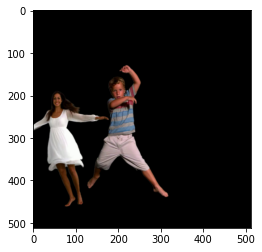

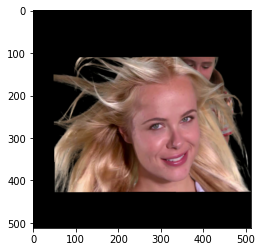

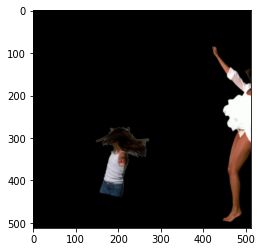

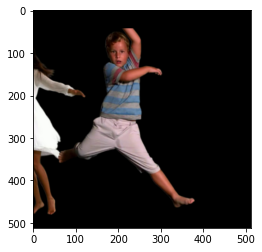

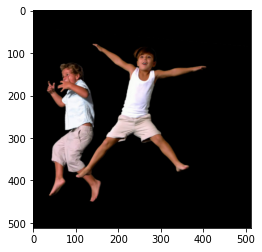

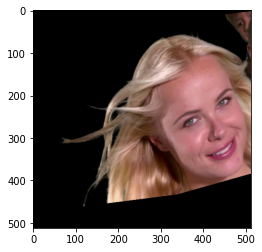

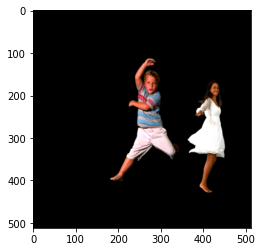

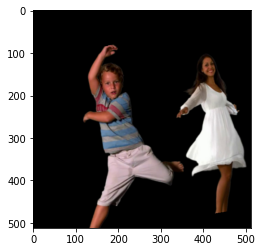

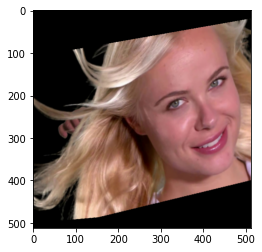

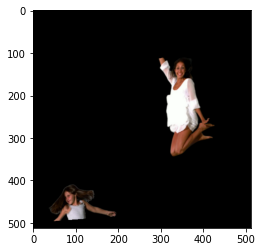

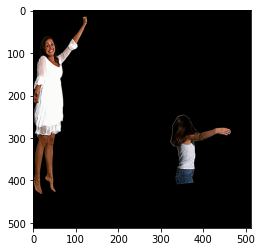

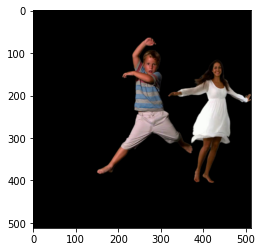

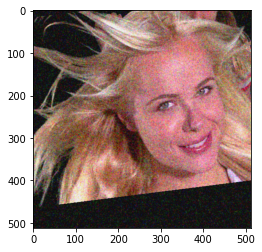

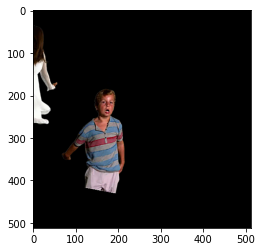

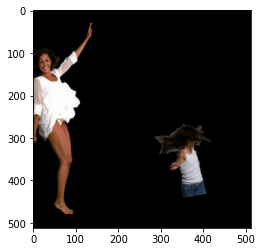

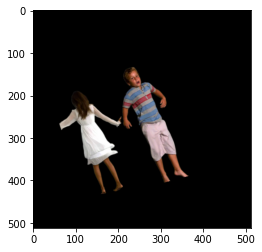

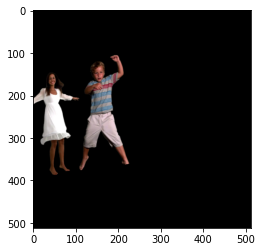

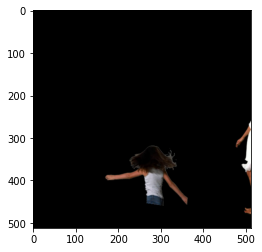

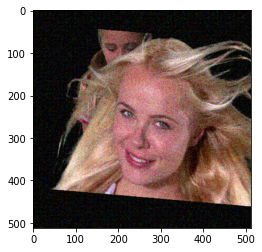

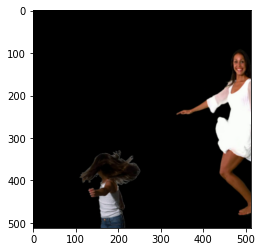

In [4]:
i=0
for fgrs, phas,pha_coms, bgrs in dataloader:
    for f in fgrs:
        view_np=f[0].numpy()
        view_np=np.transpose(view_np,[1,2,0])
        view_np=cv2.normalize(view_np,None,0,255,cv2.NORM_MINMAX)
        view_np=view_np.astype(np.uint8)
        plt.figure()
        plt.imshow(view_np)
    i+=1
    if i>10:
        break

In [1]:
import torch

In [4]:
x = torch.tensor([1, 2, 3])
x.shape

torch.Size([3])

In [6]:
x.repeat(4, 2)

tensor([[1, 2, 3, 1, 2, 3],
        [1, 2, 3, 1, 2, 3],
        [1, 2, 3, 1, 2, 3],
        [1, 2, 3, 1, 2, 3]])

In [5]:
x.shape

torch.Size([3])